## Data

Spaceship Titanic
Predict which passengers are transported to an alternate dimension
source: https://www.kaggle.com/competitions/spaceship-titanic/data

In [1]:
import pandas as pd
import numpy as np

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
sample_sub = pd.read_csv('sample_submission.csv')

In [3]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [5]:
sample_sub.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


In [6]:
train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [7]:
print(train_df.columns)
train_df.shape

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')


(8693, 14)

In [8]:
num_cols = [col_name for col_name in train_df.columns if train_df[col_name].dtype in ['int64','float64','double']]
print(num_cols)

['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']


In [9]:
cat_cols = (train_df.dtypes == 'object')
object_cols = list(cat_cols[cat_cols].index)
object_unique = list(map(lambda col: train_df[col].nunique(), object_cols))
object_dict = dict(zip(object_cols, object_unique))

print(object_dict)

{'PassengerId': 8693, 'HomePlanet': 3, 'CryoSleep': 2, 'Cabin': 6560, 'Destination': 3, 'VIP': 2, 'Name': 8473}


In [10]:
missing_vals_per_col = (train_df.isnull().sum())
print(missing_vals_per_col[missing_vals_per_col > 0])

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
dtype: int64


In [11]:
infs_val = (train_df.isin([np.inf,-np.inf]).sum())
print(infs_val[infs_val > 0])

Series([], dtype: int64)


In [12]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split

# dropna() drops missing values
X = train_df.copy().dropna()
X = X.drop(['Cabin', 'PassengerId'], axis=1)
y = X.pop('Transported')
names = X.pop('Name')
print(X.shape)

features_num = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

features_cat = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

preprocessor = make_column_transformer(
    (StandardScaler(), features_num),
    (OneHotEncoder(), features_cat),
)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=0)

X_train = preprocessor.fit_transform(X_train)
X_valid = preprocessor.transform(X_valid)
y_train = y_train
y_valid = y_valid
X.head()

(6606, 10)


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0


https://www.kaggle.com/code/ryanholbrook/dropout-and-batch-normalization

In [13]:
print(X_train[0])
print(X_train.shape)

[ 0.2878474  -0.34363239  0.15705935 -0.28649626 -0.27091943 -0.24316033
  1.          0.          0.          1.          0.          0.
  0.          1.          1.          0.        ]
(4954, 16)


## Model

### Dropout layers
Randomly drops out some fraction of a layer's input units every step of training, making it much harder for the network to learn those spurious patterns in the training data. Instead, it has to search for broad, general patterns, whose weight patterns tend to be more robust.

### Batch normalization
A batch normalization layer looks at each batch as it comes in, first normalizing the batch with its own mean and standard deviation, and then also putting the data on a new scale with two trainable rescaling parameters. Batchnorm, in effect, performs a kind of coordinated rescaling of its inputs.

In [14]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(1024, activation='relu', input_shape=[X_train.shape[1]]),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1),
])

2023-04-18 17:33:34.797816: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2023-04-18 17:33:37.808264: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-04-18 17:33:37.819584: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2023-04-18 17:33:38.131369: E tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:927] could not open file to read NUMA node: /sys/bus/pci/devices/0000:1c:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-04-18 17:33:38.131457: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:1c:00.0 name: NVIDIA GeForce GTX 1660 SUPER computeCapability: 7.5
coreClock: 1.815GHz coreCount: 22 deviceMemorySize: 6.00GiB deviceMemoryBandwidth: 312.97GiB/s
2023-04-18 17:33:38.131539: I tensorflow/stream_executor/

Epoch 1/101
20/20 [==============================] - 2s 59ms/step - loss: 0.2651 - val_loss: 0.2534
Epoch 2/101
20/20 [==============================] - 1s 41ms/step - loss: 0.2577 - val_loss: 0.2673
Epoch 3/101
20/20 [==============================] - 1s 39ms/step - loss: 0.2267 - val_loss: 0.2328
Epoch 4/101
20/20 [==============================] - 1s 38ms/step - loss: 0.2421 - val_loss: 0.2285
Epoch 5/101
20/20 [==============================] - 1s 38ms/step - loss: 0.2293 - val_loss: 0.2523
Epoch 6/101
20/20 [==============================] - 1s 39ms/step - loss: 0.2404 - val_loss: 0.2275
Epoch 7/101
20/20 [==============================] - 1s 39ms/step - loss: 0.2232 - val_loss: 0.2365
Epoch 8/101
20/20 [==============================] - 1s 38ms/step - loss: 0.2302 - val_loss: 0.2377
Epoch 9/101
20/20 [==============================] - 1s 42ms/step - loss: 0.2333 - val_loss: 0.2274
Epoch 10/101
20/20 [==============================] - 1s 42ms/step - loss: 0.2319 - val_loss: 0.2332

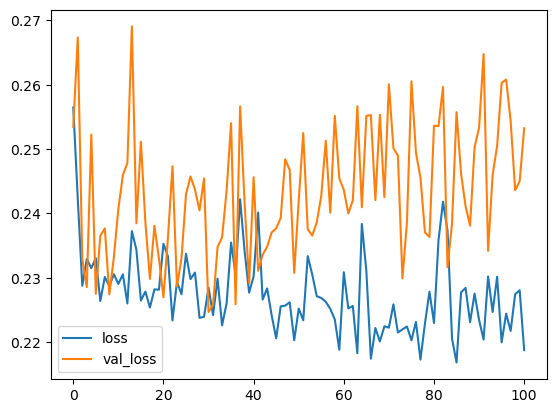

In [17]:
model.compile(
    optimizer='adam',
    loss='mae',
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=101,
    verbose=1,
)

# Show the learning curves
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();

In [16]:
model.predict(X_valid)

array([[1.032782  ],
       [1.0199864 ],
       [1.0278236 ],
       ...,
       [0.04491724],
       [1.006038  ],
       [0.04061799]], dtype=float32)